In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2023-06-12 02:06:01.907755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 02:06:02.272456: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-12 02:06:02.272491: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-12 02:06:03.510585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

In [4]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:


ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2023-06-12 02:06:28.176947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-12 02:06:28.177546: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-12 02:06:28.177660: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-12 02:06:28.177733: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-12 02:06:28.177799: W tensorflow/c

Epoch 1/5


2023-06-12 02:06:28.784978: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 73s 46ms/step - loss: 1.8154 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.6255 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5433 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4838 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4335 - accuracy: 0.4943


In [10]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.54      0.53      1000
           1       0.64      0.60      0.62      1000
           2       0.57      0.05      0.09      1000
           3       0.35      0.34      0.35      1000
           4       0.41      0.35      0.38      1000
           5       0.47      0.25      0.33      1000
           6       0.63      0.36      0.46      1000
           7       0.29      0.81      0.42      1000
           8       0.49      0.72      0.58      1000
           9       0.65      0.41      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.43     10000
weighted avg       0.50      0.45      0.43     10000



In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-06-12 02:20:06.991207: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 19s 12ms/step - loss: 1.5090 - accuracy: 0.4611
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1413 - accuracy: 0.6020
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0126 - accuracy: 0.6471
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9342 - accuracy: 0.6739
Epoch 5/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.8744 - accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8250 - accuracy: 0.7142
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7795 - accuracy: 0.7291
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7423 - accuracy: 0.7427
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7070 - accuracy: 0.7523
Epoch 10/10
1563/1563 [==============================] - 16s 11ms/step - lo

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9196 - accuracy: 0.6964


[0.9195761680603027, 0.696399986743927]

In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.4838234e-03, 3.2881889e-04, 1.2515487e-02, 5.2374738e-01,
        4.0700618e-04, 4.5010832e-01, 2.3404518e-03, 6.4693289e-05,
        8.8009471e-03, 2.0300783e-04],
       [2.2707931e-03, 6.7618089e-03, 2.8197437e-06, 6.0695051e-08,
        1.5585796e-05, 3.1916263e-09, 6.4017364e-10, 3.2689877e-07,
        9.9080461e-01, 1.4408067e-04],
       [9.6027009e-02, 4.6359379e-02, 2.1489367e-02, 6.2563522e-03,
        8.4561110e-03, 2.7373601e-03, 2.0089603e-03, 2.6792176e-03,
        7.9043037e-01, 2.3555856e-02],
       [8.3702201e-01, 1.7030472e-02, 3.6501244e-02, 1.4932683e-03,
        1.7361652e-02, 4.7822145e-05, 8.5033607e-05, 6.2468066e-04,
        8.9433007e-02, 4.0077133e-04],
       [1.5061954e-07, 8.5277075e-04, 1.6013272e-03, 6.7245155e-03,
        2.4753956e-02, 2.3825724e-04, 9.6579492e-01, 1.6761884e-07,
        2.8818420e-05, 4.9965038e-06]], dtype=float32)

In [16]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [18]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

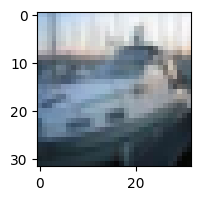

In [20]:
plot_sample(X_test, y_test,2)

In [22]:
classes[y_classes[2]]

'ship'